In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from scipy import stats

In [3]:
loss_file = "../../bats_transformer/outputs/daytime_files_new_10_11/models_31.log"
losses = pd.read_csv(loss_file)
losses

,Unnamed: 0,TimeIndex,TimeInFile,PrecedingIntrvl,HiFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,FreqKnee,PrcntKneeDur,...,UpprKnFreq,HiFtoUpprKnAmp,HiFtoKnAmp,HiFtoFcAmp,UpprKnToKnAmp,KnToFcAmp,LdgToFcAmp,file_id,chirp_idx,model_id
0,0,1.678744,0.598857,0.035106,2.747095,2.642091,1.328641,0.927971,0.646103,0.108442,...,1.472526,0.039125,0.027971,0.067557,0.035434,0.000443,0.028197,1694.0,8.0,models/models_31
1,1,1.678744,0.575110,0.488680,1.349729,1.215510,0.406335,0.541036,1.198690,0.420219,...,0.744707,0.068362,0.053481,0.068650,0.016538,0.031168,0.041044,1694.0,7.0,models/models_31
2,2,1.678744,0.411671,5.989191,0.000111,0.002134,0.889824,0.238115,0.580377,0.011243,...,0.184555,0.023839,0.003161,0.032537,0.005823,0.014726,0.002379,1694.0,6.0,models/models_31
3,3,1.678744,0.045231,4.523813,0.110367,0.635952,0.470992,0.567685,0.474324,0.167582,...,0.370192,0.016988,0.034218,0.051121,0.004898,0.027071,0.005860,1694.0,5.0,models/models_31
4,4,1.678744,0.238413,0.122190,0.984612,0.551609,3.146087,0.137966,2.827939,0.083056,...,2.093760,0.014047,0.000173,0.010380,0.037830,0.007233,0.027875,1694.0,4.0,models/models_31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1087,1.678744,0.022609,1.801991,0.066379,0.354350,0.034940,0.592324,0.382856,0.009299,...,0.359413,0.001948,0.000070,0.044644,0.011767,0.004298,0.002778,1765.0,9.0,models/models_31
1088,1088,1.678744,0.023708,0.632586,0.254221,0.803956,0.217013,0.027852,0.000066,0.248116,...,0.707712,0.028694,0.006123,0.000429,0.006239,0.005975,0.000746,1765.0,8.0,models/models_31
1089,1089,1.678744,0.014484,0.453263,0.337524,0.392938,0.231308,0.869273,0.501977,0.006075,...,0.271575,0.005809,0.004016,0.088541,0.001122,0.041751,0.000005,1765.0,7.0,models/models_31
1090,1090,1.678744,0.347152,0.192061,0.057249,0.133195,0.060060,0.222467,0.004696,0.244356,...,0.094340,0.050864,0.000613,0.017742,0.016140,0.033616,0.000442,1765.0,6.0,models/models_31


In [5]:
# calculate column-wise averages (numeric columns only) and display
col_means = losses.mean(numeric_only=True).round(6)
col_means

Unnamed: 0          545.500000
TimeIndex             1.678744
TimeInFile            0.474984
PrecedingIntrvl       1.221182
HiFreq                0.561288
Bndwdth               0.753547
FreqMaxPwr            0.481634
PrcntMaxAmpDur        0.798639
FreqKnee              0.428062
PrcntKneeDur          0.242510
StartF                0.551480
FreqCtr               0.438139
FFwd32dB              0.772706
FFwd20dB              0.550066
FFwd15dB              0.494868
FBak5dB               0.407388
FFwd5dB               0.448270
Bndw32dB              1.109179
Amp1stQrtl            0.658149
Amp2ndQrtl            0.548812
Amp3rdQrtl            0.663192
Amp4thQrtl            0.890511
AmpK@start            1.347857
UpprKnFreq            0.543007
HiFtoUpprKnAmp        0.044836
HiFtoKnAmp            0.024676
HiFtoFcAmp            0.065062
UpprKnToKnAmp         0.026715
KnToFcAmp             0.019652
LdgToFcAmp            0.025575
file_id            1727.520147
chirp_idx            13.176740
dtype: f

In [13]:
first_attribute = 'LdgToFcAmp'
second_attribute = 'KnToFcAmp'

In [14]:
# summary statistics for the two attributes (uses existing variables)
s1 = losses[first_attribute].dropna()
s2 = losses[second_attribute].dropna()

def summary_series(s):
    return pd.Series({
        'count': int(s.count()),
        'mean': s.mean(),
        'median': s.median(),
        'std': s.std(ddof=1),
        'var': s.var(ddof=1),
        'min': s.min(),
        '25%': s.quantile(0.25),
        '50%': s.quantile(0.50),
        '75%': s.quantile(0.75),
        'max': s.max(),
        'skew': stats.skew(s),
        'kurtosis': stats.kurtosis(s)
    })

stats_df = pd.DataFrame({
    first_attribute: summary_series(s1),
    second_attribute: summary_series(s2)
}).T

# round for display
print(stats_df.round(6))

             count      mean    median       std       var  min       25%  \
LdgToFcAmp  1092.0  0.025575  0.014032  0.030677  0.000941  0.0  0.004232   
KnToFcAmp   1092.0  0.019652  0.011288  0.023437  0.000549  0.0  0.002790   

                 50%       75%       max     skew  kurtosis  
LdgToFcAmp  0.014032  0.035869  0.213235  2.20750  6.527468  
KnToFcAmp   0.011288  0.028458  0.169205  2.08889  5.937432  


In [15]:
# use existing variable names from the notebook
x = losses[first_attribute].dropna().values
y = losses[second_attribute].dropna().values
alpha = 0.05

def cliffs_delta(a, b):
    # efficient pairwise comparison
    a = np.asarray(a)
    b = np.asarray(b)
    n1, n2 = len(a), len(b)
    # compare via broadcasting in chunks to avoid huge memory for large arrays
    wins = 0
    losses = 0
    chunk = 1000
    for i in range(0, n1, chunk):
        ai = a[i:i+chunk][:, None]
        cmp = ai - b[None, :]
        wins += np.sum(cmp > 0)
        losses += np.sum(cmp < 0)
    return (wins - losses) / (n1 * n2)

# Normality checks (Shapiro)
sh_x = stats.shapiro(x)
sh_y = stats.shapiro(y)

# Parametric test (Welch's t-test)
t_res = stats.ttest_ind(x, y, equal_var=False)

# Non-parametric tests
mw_res = stats.mannwhitneyu(x, y, alternative='two-sided')
ks_res = stats.ks_2samp(x, y, alternative='two-sided')

# Effect sizes
cohen_d = (x.mean() - y.mean()) / np.sqrt(((x.std(ddof=1) ** 2) + (y.std(ddof=1) ** 2)) / 2)
cdelta = cliffs_delta(x, y)

# Summarize results
print(f"Attributes: {first_attribute} (n={len(x)}) vs {second_attribute} (n={len(y)})")
print(f"\nNormality (Shapiro):")
print(f"  {first_attribute}: W={sh_x.statistic:.4f}, p={sh_x.pvalue:.4g} {'(non-normal)' if sh_x.pvalue < alpha else '(approx normal)'}")
print(f"  {second_attribute}: W={sh_y.statistic:.4f}, p={sh_y.pvalue:.4g} {'(non-normal)' if sh_y.pvalue < alpha else '(approx normal)'}")

print(f"\nWelch's t-test (two-sided): t={t_res.statistic:.4f}, p={t_res.pvalue:.4g}")
print(f"Mann-Whitney U (two-sided): U={mw_res.statistic:.4f}, p={mw_res.pvalue:.4g}")
print(f"Kolmogorov-Smirnov (two-sided): D={ks_res.statistic:.4f}, p={ks_res.pvalue:.4g}")

print(f"\nEffect sizes:")
print(f"  Cohen's d = {cohen_d:.4f}  (small~0.2, medium~0.5, large~0.8)")
print(f"  Cliff's delta = {cdelta:.4f}  (|d|<0.147 negligible, <0.33 small, <0.474 medium, >=0.474 large)")

# Simple interpretation
print("\nInterpretation (alpha = {:.2f}):".format(alpha))
if t_res.pvalue < alpha:
    print("  - Welch's t-test: distributions differ (reject H0).")
else:
    print("  - Welch's t-test: no strong evidence of difference (fail to reject H0).")
if mw_res.pvalue < alpha:
    print("  - Mann-Whitney U: distributions differ (reject H0).")
else:
    print("  - Mann-Whitney U: no strong evidence of difference (fail to reject H0).")
if ks_res.pvalue < alpha:
    print("  - KS test: distributions differ (reject H0).")
else:
    print("  - KS test: no strong evidence of difference (fail to reject H0).")

Attributes: LdgToFcAmp (n=1092) vs KnToFcAmp (n=1092)

Normality (Shapiro):
  LdgToFcAmp: W=0.7675, p=1.114e-36 (non-normal)
  KnToFcAmp: W=0.7795, p=5.885e-36 (non-normal)

Welch's t-test (two-sided): t=5.0701, p=4.336e-07
Mann-Whitney U (two-sided): U=658885.0000, p=2.12e-05
Kolmogorov-Smirnov (two-sided): D=0.0879, p=0.0004293

Effect sizes:
  Cohen's d = 0.2170  (small~0.2, medium~0.5, large~0.8)
  Cliff's delta = 0.1051  (|d|<0.147 negligible, <0.33 small, <0.474 medium, >=0.474 large)

Interpretation (alpha = 0.05):
  - Welch's t-test: distributions differ (reject H0).
  - Mann-Whitney U: distributions differ (reject H0).
  - KS test: distributions differ (reject H0).


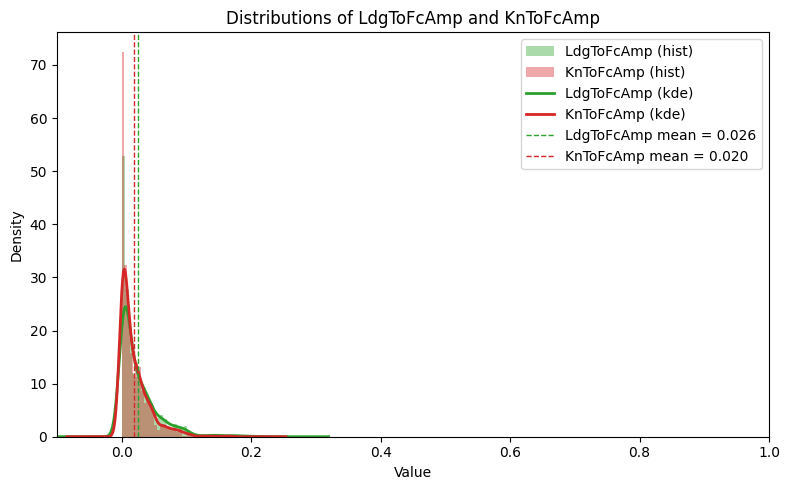

In [18]:
fig, ax2 = plt.subplots(figsize=(8, 5))

# Histograms (normalized) with transparency
losses[first_attribute].plot(kind='hist', bins=40, density=True, alpha=0.4, ax=ax2, color='C2', label=f"{first_attribute} (hist)")
losses[second_attribute].plot(kind='hist', bins=40, density=True, alpha=0.4, ax=ax2, color='C3', label=f'{second_attribute} (hist)')

# KDE overlays
losses[first_attribute].plot(kind='kde', ax=ax2, color='C2', linewidth=2, label=f'{first_attribute} (kde)')
losses[second_attribute].plot(kind='kde', ax=ax2, color='C3', linewidth=2, label=f'{second_attribute} (kde)')

# Mean lines (use existing col_means)
ax2.axvline(col_means[first_attribute], color='C2', linestyle='--', linewidth=1, label=f"{first_attribute} mean = {col_means[first_attribute]:.3f}")
ax2.axvline(col_means[second_attribute], color='C3', linestyle='--', linewidth=1, label=f"{second_attribute} mean = {col_means[second_attribute]:.3f}")

ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title(f'Distributions of {first_attribute} and {second_attribute}')
ax2.legend()
plt.xlim(-0.1, 1)
plt.tight_layout()
plt.show()

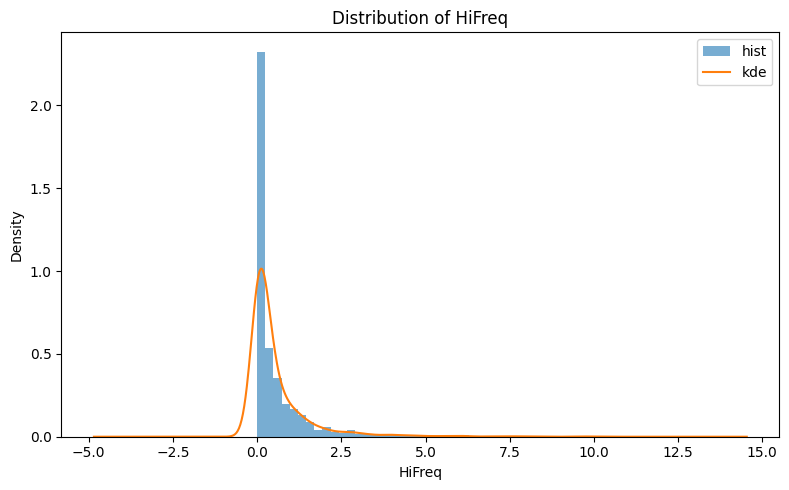

In [ ]:
# # Plot distribution of the 'HiFreq' column (histogram + KDE)
# column = "HiFreq"

# plt.figure(figsize=(8, 5))
# ax = losses[column].plot(kind='hist', bins=40, density=True, alpha=0.6, color='C0', label='hist')
# losses[column].plot(kind='kde', ax=ax, color='C1', label='kde')
# ax.set_xlabel(column)
# ax.set_ylabel('Density')
# ax.set_title('Distribution of HiFreq')
# ax.legend()
# plt.tight_layout()
# plt.show()